In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen, WetterVorhersageNBG
from DatenVerarbeitung import DatenVerarbeitung

from datetime import date

In [2]:
today = date.today()

In [3]:
df = DatenVerarbeitung()

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.
100%|██████████| 1/1 [00:01<00:00,  1.87s/it]
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
WetterVorhersage = WetterVorhersageNBG()

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/36.0M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 736k/36.0M [00:00<00:04, 7.44MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.43M/36.0M [00:00<00:04, 7.29MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.12M/36.0M [00:00<00:04, 7.27MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.82M/36.0M [00:00<00:04, 7.07MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:  10%|▉         | 3.50M/36.0M [00:00<00:05, 6.37MiB/s]
https://opendata.dwd.de/weathe

In [5]:
df_test = df

In [6]:
trainings_zeitraum_von = '2020-8-01'
df_test = df_test.loc[df_test.index>trainings_zeitraum_von].copy()

<AxesSubplot:title={'center':'Trainingsdaten am 2021-04-11'}, xlabel='Date'>

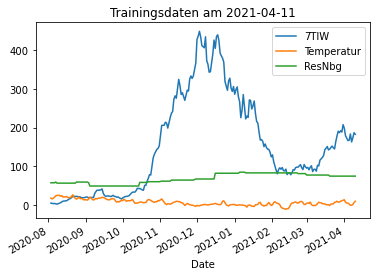

In [7]:
df_test.plot(title='Trainingsdaten am '+str(today))

In [8]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [9]:
df_test

,ds,y,Temperatur,ResNbg
0,2020-08-03,5.598456,18.4,57.87
1,2020-08-04,4.633205,16.3,57.87
2,2020-08-05,4.247104,18.1,57.87
3,2020-08-06,4.633205,20.9,57.87
4,2020-08-07,3.861004,24.2,59.72
...,...,...,...,...
237,2021-04-06,183.590734,-0.1,75.00
238,2021-04-07,162.934363,0.3,75.00
239,2021-04-08,173.552124,1.9,75.00
240,2021-04-09,186.679537,7.1,75.00


In [10]:
m = Prophet(changepoint_prior_scale=2)
m.add_country_holidays(country_name='DE')
m.add_regressor('Temperatur')
m.add_regressor('ResNbg')
m.fit(df_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
#WetterVorhersage.head(20)

In [12]:
future = m.make_future_dataframe(periods=10,include_history=False)
future = future.set_index('ds')
#future.tail(20)

In [13]:
future['Temperatur'] = future.join(WetterVorhersage)
future['ResNbg'] = 75
future = future.reset_index()

In [14]:
#future.tail(20)

In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5,2021-04-16,211.509135,189.197298,231.600338
6,2021-04-17,215.332642,191.105244,237.458818
7,2021-04-18,225.179184,199.597628,249.578436
8,2021-04-19,228.725448,198.925646,253.641426
9,2021-04-20,232.470962,196.287652,258.398592


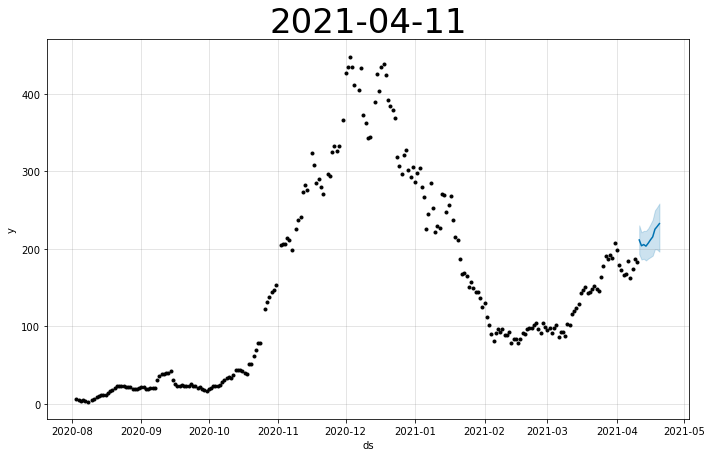

In [30]:
fig = m.plot(forecast)
ax = fig.gca()
ax.set_title(today, size=34)
fig.savefig('Vorhersagen/'+str(today)+'.png')
plt.close(fig)

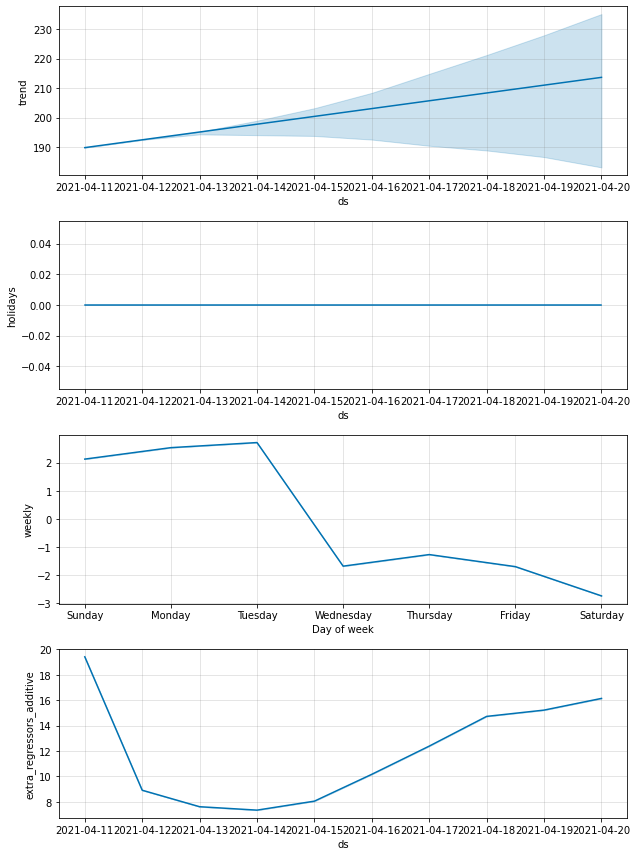

In [17]:
fig2 = m.plot_components(forecast)